# Projeto Final de Supercomputação
    
Aluno: Leonardo Malta

Prof: Luciano Soares

## Introdução

Travelling Sales Person (TSP), é um problema em que, para uma lista de cidades, o caixeiro viajante deseja descobrir o melhor trajeto fechado possível (mais curto), passando por todas as cidades e começando de qualquer lugar. TSP é um problema de otimização NP-hard, ou seja, não existe solução em tempo polinomial que encontre a melhor solução possível (solução global), entretando, existem técnicas que tentam otimizar essas implementações, e uma delas é encontrar a melhor solução local, que também será uma ótima solução, mas demora muito menos tempo.

A busca local, pode ser implementada de diversas formas, como sequencial ou paralelizada com CPU ou GPU, e a implementação que irá retornar a melhor solução local em menos tempo, varia em relação ao número de cidades, e é isso que o relatório a seguir irá discutir.

## Objetivo

Análise de Eficiência de um algorítimo utilizando uma mesma implementação de uma busca local para o problema do Caixeiro Viajante, de forma sequencial, paralelizada e utilizando GPU.


## Import de Bibliotecas

In [7]:
# Compile C++ code using Python
import os
import sys
import subprocess
from subprocess import Popen, PIPE
import numpy as np
import matplotlib.pyplot as plt
import time


## Compilando as Implementações

In [21]:
# Compile C++ code for global search
subprocess.call(["g++", "-std=c++11", "-o", "busca-exaustiva/exec", "busca-exaustiva/main.cpp"])

# Compile C++ busca local normal code
subprocess.call(["g++", "-std=c++11", "-o", "busca-local/exec", "busca-local/main.cpp"])

# Compile C++ busca local com openmp
subprocess.call(["g++", "-std=c++11", "-fopenmp", "-o", "busca-local-openmp/exec", "busca-local-openmp/main.cpp"])

# Compile C++ busca local com CUDA
# subprocess.call(["nvcc", "-arch=sm_70", "-std=c++14", "-o", "busca-local-gpu/exec", "busca-local-gpu/main.cu"])

0

## Funções para guardar os tempos das implementações e plotar os gráficos

In [34]:
def run(exec_path, entry):
    """Function to run C++ code, saving time and printing output"""
    start = time.perf_counter()
    str_path = "./" + exec_path
    str_entry = "< " + entry
    process = Popen(str_path + " " + str_entry, stdout=PIPE, stderr=PIPE, shell=True)
    stdout, stderr = process.communicate()
    end = time.perf_counter()
    total_time = end - start
    return total_time


def plot_local_search(n=100):
    buscal_local = []
    buscal_local_openmp = []
    buscal_local_gpu = []

    for i in range(0, n):
        buscal_local.append(run("busca-local/exec", f"entradas/in-{i}.txt"))
        buscal_local_openmp.append(run("busca-local-openmp/exec", f"entradas/in-{i}.txt"))
        # buscal_local_gpu.append(run("busca-local-gpu/exec", f"entradas/in-{i}.txt"))

    # Plot results
    plt.plot(buscal_local, label="Busca Local", color="blue")
    plt.plot(buscal_local_openmp, label="Busca Local OpenMP", color="red")
    # plt.plot(buscal_local_gpu, label="Busca Local GPU", color="green")
    plt.legend()
    plt.xlabel("N° Cidades")
    plt.ylabel("Tempo (s)")
    plt.title("Tempo de execução dos algoritmos")
    plt.show()


def plot_global_search(n=7):
    buscal_exaustiva = []
    busca_local_openmp = []
    busca_local_gpu = []

    for i in range(0, n):
        buscal_exaustiva.append(run("busca-exaustiva/exec", f"entradas/in-{i}.txt"))
        busca_local_openmp.append(run("busca-local-openmp/exec", f"entradas/in-{i}.txt"))
        #busca_local_gpu.append(run("busca-local-gpu/exec", f"entradas/in-{i}.txt"))

    # Plot results
    plt.plot(buscal_exaustiva, label="Busca Exaustiva", color="blue")
    plt.plot(busca_local_openmp, label="Busca Local OpenMP", color="red")
    # plt.plot(busca_local_gpu, label="Busca Local GPU", color="green")
    plt.legend()
    plt.xlabel("N° Cidades")
    plt.ylabel("Tempo (s)")
    plt.title("Tempo de execução dos algoritmos")
    plt.show()


def compare_gpu_cpu(n=250):
    buscal_local = []
    buscal_local_gpu = []

    for i in range(0, n):
        buscal_local.append(run("busca-local/exec", f"entradas/in-{i}.txt"))
        # buscal_local_gpu.append(run("busca-local-gpu/exec", f"entradas/in-{i}.txt"))

    # Plot results
    plt.plot(buscal_local, label="Busca Local", color="blue")
    # plt.plot(buscal_local_gpu, label="Busca Local GPU", color="green")
    plt.legend()
    plt.xlabel("N° Cidades")
    plt.ylabel("Tempo (s)")
    plt.title("Tempo de execução dos algoritmos")
    plt.show()

## Se você pudesse escolher um método para resolver este problema, qual seria?

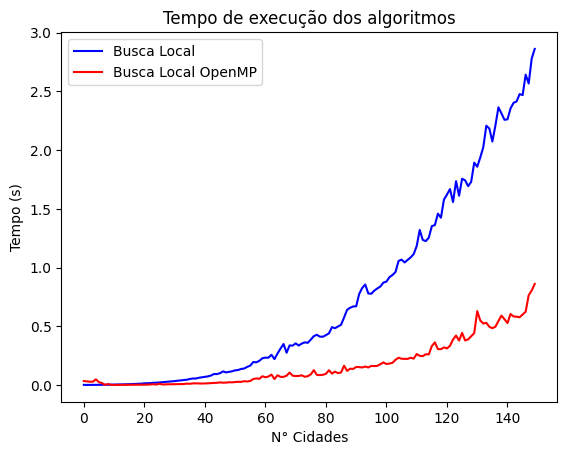

In [14]:
plot_local_search(n=150)

De posse dos resultados obtidos no gráfico acima, é possível notar que a solução sequencial nunca é a melhor opção, dado que, mesmo para um número não tão grande de cidades, a busca local paralelizada na CPU e na GPU conseguem fazer tempos similares.

A discussão entre utilizar a paralelização na GPU ou na CPU, depende do número de cidades. Como é possível observar no gráfico, para um n de X cidades, já é possível perceber que o uso da GPU é melhor, e para números menores que isso, a paralelização na GPU é mais eficiente.

## Fizemos implementações paralelas da busca local. Valeria a pena gastar dinheiro comprando uma CPU com mais cores ou uma GPU potente?

Depende do problema. Como mostra o gráfico abaixo, para um problema em que o número de cidades é muito grande, a GPU tem resultados superiores, mas até um número X de cidades vale mais a pena investir em uma CPU com mais cores. Assim, o investimento varia de qual vai ser o intervalo de operação utilizado.

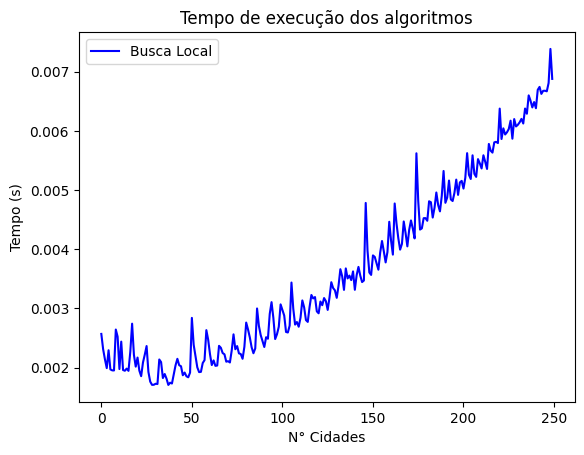

In [35]:
compare_gpu_cpu()

## Vale a pena esperar pelo resultado da busca exaustiva?

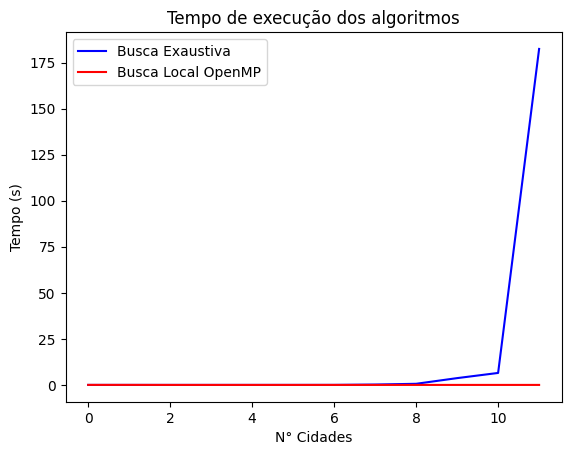

In [32]:
plot_global_search(n=12)

De posse dos resultados acima, para um número não tão expressivo de cidades (12), a quantidade de tempo explode em relação a busca local paralelizada. Sendo assim, para um número muito grande de cidades, não vale a pena esperar o tempo que a busca exautiva demora para encontrar a melhor solução, uma vez que a busca local consegue retornar um valor muito bom, em um tempo muito menor.

## Conclusão

Com base no estudo conduzido, é possível inferir que a busca global, apesar de retornar a melhor solução global, o tempo levado para encontrar a solução evolui fatotorialmente, logo, ao menos que a implementação precise que a solução encontrada seja necessariamente a global, as implementações de busca local paralelizada, são as mais recomendadas, pois conseguem encontrar bons resultados, em muito menos tempo.

Comparar o desempenho da GPU e CPU sempre depende do número que a implementação irá utilizar, entretanto, para números mais elevados, uma GPU mais potente, tem se mostrado mais rápido que uma CPU com mais Cores.